In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

+ ```python lebwohl_lasher.py 500 50 0.5 1```

$\textbf{1. Ensure Correct Plots Are Produced}$

In [2]:
def plot_data(data):
    """
    Plots energy and order parameter against Monte Carlo step.

    Parameters
    ----------
    data : pd.DataFrame
        The data from the Lebwohl-Lasher simulation.
    """

    # Plot energy and order parameter against Monte Carlo step.
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(data.index, data["Energy"])
    ax[1].plot(data.index, data["Order"])

    ax[0].set_title("Reduced Temperature = 0.5")
    ax[0].set_xlabel("Monte Carlo Step")
    ax[0].set_ylabel("Reduced Energy")

    ax[1].set_title("Reduced Temperature = 0.5")
    ax[1].set_xlabel("Monte Carlo Step")
    ax[1].set_ylabel("Order Parameter")

    fig.tight_layout()
    plt.show()

$\textbf{1.1 Base Version}$

+ ```lebwohl_lasher.py Version: Commit - f24272d3b723955fc846da8a6c7a7c0df1c04d4f```

In [3]:
# Read in the output data.
data_001 = pd.DataFrame(np.loadtxt("output_logs/output_normal_f24272d3b723955fc846da8a6c7a7c0df1c04d4f.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2557.4  |  0.2631 |
|     1 |  0.6644 | -3782.31 |  0.2788 |
|     2 |  0.628  | -4491.71 |  0.2846 |
|     3 |  0.5796 | -5101.4  |  0.2895 |
|     4 |  0.5648 | -5536.65 |  0.2952 |


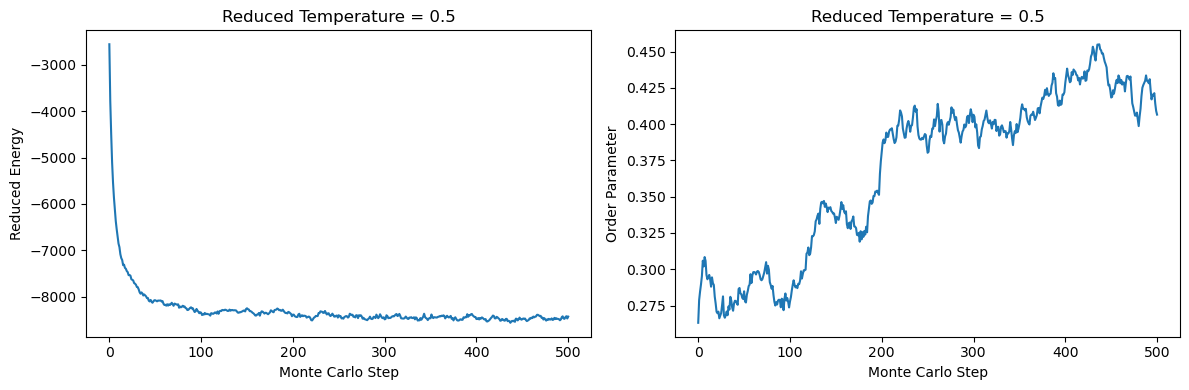

In [4]:
# Plot the data.
plot_data(data_001)

$\textbf{1.2 Accelerated Function:}$ ```total_energy```

+ ```lebwohl_lasher.py Version: Commit - 4510ab17d2312ee96454e6b5a152fc2c6ab16edf```

In [5]:
# Read in the output data.
data_002 = pd.DataFrame(np.loadtxt("output_logs/output_normal_4510ab17d2312ee96454e6b5a152fc2c6ab16edf.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2600.65 |  0.2532 |
|     1 |  0.68   | -3813.85 |  0.2581 |
|     2 |  0.6244 | -4558.53 |  0.2697 |
|     3 |  0.5856 | -5132.18 |  0.278  |
|     4 |  0.5584 | -5482.62 |  0.2764 |


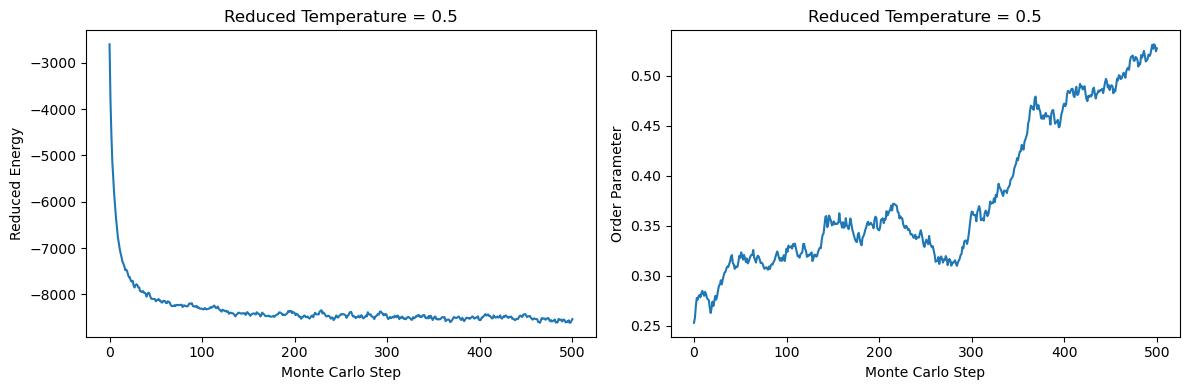

In [6]:
# Plot the data.
plot_data(data_002)

$\textbf{2. Check Output Values Are Consistent}$

+ $\text{Test if the output logs across versions of the code are the same.}$
+ $\text{This is done through performing a simulation where the random seed is to 42.}$

- ```-> np.random.seed(42)```

$\textbf{2.1 Base Version}$

+ ```lebwohl_lasher.py Version: Commit - f24272d3b723955fc846da8a6c7a7c0df1c04d4f```

In [7]:
# Read in the data.
data_compare_001 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_f24272d3b723955fc846da8a6c7a7c0df1c04d4f.txt", 
                                             dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2566.27 |  0.2711 |
|     1 |  0.6864 | -3794.81 |  0.2564 |
|     2 |  0.6172 | -4468.36 |  0.2618 |
|     3 |  0.59   | -5037.29 |  0.27   |
|     4 |  0.5632 | -5493.34 |  0.275  |


$\textbf{2.2 Accelerated Function:}$ ```total_energy```

+ ```lebwohl_lasher.py Version: Commit - 4510ab17d2312ee96454e6b5a152fc2c6ab16edf```

In [8]:
# Read in the data.
data_compare_002 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_4510ab17d2312ee96454e6b5a152fc2c6ab16edf.txt", 
                                             dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2566.27 |  0.2711 |
|     1 |  0.6864 | -3794.81 |  0.2564 |
|     2 |  0.6172 | -4468.36 |  0.2618 |
|     3 |  0.59   | -5037.29 |  0.27   |
|     4 |  0.5632 | -5493.34 |  0.275  |


In [9]:
# Assert the new version produces data is consistent.
np.allclose(data_compare_001, data_compare_002)

True

$\textbf{3. Time Specific Functions}$

In [10]:
# Import the script.
import lebwohl_lasher

In [11]:
# Generate a lattice.
lattice_length = 50
lattice = lebwohl_lasher.init_lattice(lattice_length)

$\textbf{3.1 Base Version}$

+ ```lebwohl_lasher.py Version: Commit - f24272d3b723955fc846da8a6c7a7c0df1c04d4f```

In [ ]:
# # Time the "cell_energy" function.
# %timeit lebwohl_lasher.cell_energy(lattice, lattice_length, *np.random.randint(0, high=lattice_length, size=2))

17.5 μs ± 1.92 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
# # Time the "total_energy" function.
# %timeit lebwohl_lasher.total_energy(lattice, lattice_length)

18.5 ms ± 755 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# # Time the "calculate_order" function.
# %timeit lebwohl_lasher.calculate_order(lattice, lattice_length)

18.6 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# # Time the "monte_carlo_step" function.
# %timeit lebwohl_lasher.monte_carlo_step(lattice, lattice_length, temperature=0.5)

50 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


$\textbf{3.2 Accelerated Function:}$ ```total_energy```

+ ```lebwohl_lasher.py Version: Commit - 4510ab17d2312ee96454e6b5a152fc2c6ab16edf```

In [14]:
# Time the "total_energy" function.
%timeit lebwohl_lasher.total_energy(lattice)

210 μs ± 9.55 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
